In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
df = pd.read_csv("IOT-temp dataset task 2.csv")


In [24]:
print (df.shape)

(97606, 5)


In [25]:
print (df.head(4))


                                    id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30  29.0   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30  29.0   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29  41.0   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29  41.0   

  out/in  
0     In  
1     In  
2    Out  
3    Out  


In [26]:
 print (df.isnull().sum())
#print (val.shape)

id             0
room_id/id     0
noted_date     0
temp          14
out/in         0
dtype: int64


In [27]:
df_dropped = df.drop(columns=["room_id/id", "id"])
print (df_dropped.head(4)) #18BIS0133

         noted_date  temp out/in
0  08-12-2018 09:30  29.0     In
1  08-12-2018 09:30  29.0     In
2  08-12-2018 09:29  41.0    Out
3  08-12-2018 09:29  41.0    Out


In [28]:
 dup = df_dropped.drop_duplicates(keep = "first", inplace = False) 
print (dup.head(4))   #18BIS0133

         noted_date  temp out/in
0  08-12-2018 09:30  29.0     In
2  08-12-2018 09:29  41.0    Out
4  08-12-2018 09:29  31.0     In
6  08-12-2018 09:28  29.0     In


In [29]:
val_median = dup['temp'].median()
dup['temp'].fillna(val_median,inplace = True)
print (dup['temp'])  #18BIS0133

0        29.0
2        41.0
4        31.0
6        29.0
8        29.0
10       42.0
12       29.0
14       36.0
15       29.0
16       41.0
18       29.0
20       42.0
22       29.0
24       41.0
26       29.0
28       29.0
30       29.0
32       42.0
34       29.0
36       41.0
38       29.0
39       42.0
40       30.0
41       29.0
42       42.0
43       30.0
44       30.0
45       29.0
47       29.0
49       41.0
         ... 
97519    32.0
97522    32.0
97523    31.0
97524    32.0
97525    31.0
97526    31.0
97528    31.0
97538    31.0
97544    32.0
97545    31.0
97546    32.0
97547    31.0
97548    32.0
97549    31.0
97550    32.0
97553    31.0
97554    32.0
97557    32.0
97560    31.0
97565    32.0
97566    32.0
97568    31.0
97569    32.0
97570    33.0
97571    31.0
97573    31.0
97576    31.0
97579    32.0
97594    36.0
97603    31.0
Name: temp, Length: 37281, dtype: float64


C:\Users\Anurag Dhudhwani\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [30]:
print(dup.isnull().sum())

noted_date    0
temp          0
out/in        0
dtype: int64


In [31]:
# Complete the call to convert the date column
dup['noted_date'] =  pd.to_datetime(dup['noted_date'], format='%d-%m-%Y %H:%M')
dup['noted_date'].astype('datetime64[D]').dtype
dup['noted_date'] = pd.to_numeric(pd.to_datetime(dup['noted_date']))
# Confirm the date column is in datetime format
print(df_dropped.head())
print(df_dropped.info())

         noted_date  temp out/in
0  08-12-2018 09:30  29.0     In
1  08-12-2018 09:30  29.0     In
2  08-12-2018 09:29  41.0    Out
3  08-12-2018 09:29  41.0    Out
4  08-12-2018 09:29  31.0     In
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
noted_date    97606 non-null object
temp          97592 non-null float64
out/in        97606 non-null object
dtypes: float64(1), object(2)
memory usage: 2.2+ MB
None


C:\Users\Anurag Dhudhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anurag Dhudhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
df_out = dup[dup['out/in'] =='Out'] #This Varialble has OUT in it
df_in = dup[dup['out/in'] =='In'] #This variable has IN in it

print(df_out.head())
print(df_in.head())

             noted_date  temp out/in
2   1544261340000000000  41.0    Out
10  1544261100000000000  42.0    Out
16  1544260860000000000  41.0    Out
20  1544260740000000000  42.0    Out
24  1544260620000000000  41.0    Out
             noted_date  temp out/in
0   1544261400000000000  29.0     In
4   1544261340000000000  31.0     In
6   1544261280000000000  29.0     In
8   1544261160000000000  29.0     In
12  1544261040000000000  29.0     In


In [33]:
#Splitting dataset for training and testing for OUT --> 1 for out, 2 --> IN

X1 = df_out.iloc[:, 0:2]
y1 = df_out.iloc[:, 1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=0, test_size=0.2)

In [34]:
#Splitting dataset for training and testing for IN --> 1 for out, 2 for in

X2 = df_in.iloc[:, 0:2]
y2 = df_in.iloc[:, 1]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=0, test_size=0.2)

In [35]:
#Feature scaling
sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.transform(X1_test)
sc_X2 = StandardScaler()
X2_train = sc_X2.fit_transform(X2_train)
X2_test = sc_X2.transform(X2_test)

In [36]:
classifier_IN = KNeighborsClassifier(n_neighbors= 10, p = 2, metric = 'euclidean')
classifier_IN.fit(X2_train, y2_train) #18BIS0133

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [37]:
classifier_OUT = KNeighborsClassifier(n_neighbors= 10, p = 'weighted', metric = 'euclidean')
classifier_OUT.fit(X1_train, y1_train)  #18BIS0133

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p='weighted',
           weights='uniform')

In [38]:
y1_pred = classifier_OUT.predict(X1_test)
y2_pred = classifier_IN.predict(X2_test)
cm = confusion_matrix (y1_test,y1_pred)
print (cm)
print (f1_score(y1_test,y1_pred, average='weighted'))

[[  0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0  19   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 138   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 256   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 201   2   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 235   4   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 254   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 139   0   0   0   0   0   0   

C:\Users\Anurag Dhudhwani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
cm_in = confusion_matrix(y2_test, y2_pred)
print (cm_in)
print (f1_score(y2_test, y2_pred, average='weighted')) #18BIS0133

[[  0   1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  18   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  39   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 113   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 156   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 300   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 282   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 331   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 291   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 232   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 152   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  60   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8]]
0.9969984945826177


C:\Users\Anurag Dhudhwani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
print (accuracy_score(y1_test,y1_pred))

0.9948783610755442


In [41]:
print (accuracy_score(y2_test,y2_pred))

0.9974874371859297


In [42]:
y1_pred

array([42., 45., 39., ..., 39., 39., 47.])

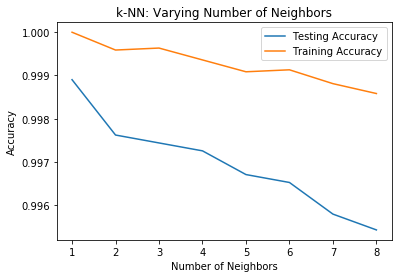

In [43]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X1_train,y1_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X1_train, y1_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X1_test, y1_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

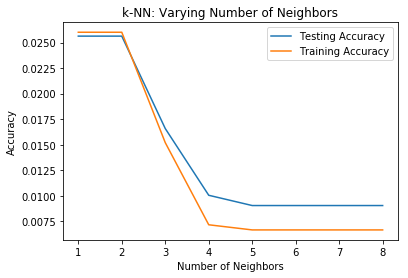

In [44]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X1_train,y1_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X2_train, y2_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X2_test, y2_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()